# Logistic Regression Offline data

In [ ]:
import numpy as np
from numpy import genfromtxt

In [ ]:
data_path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
my_data = genfromtxt(data_path, delimiter=',')

In [ ]:
print(type(my_data))
print(my_data.shape)
print(my_data.shape[1])

<class 'numpy.ndarray'>
(768, 9)
9


In [ ]:
X = my_data[:, :-1] # features
y = my_data[:, -1] # labels

print(X.shape, y.shape)

(768, 8) (768,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [ ]:
print(np.log(10))
print(np.log(0)) # use epsilon = 0.00001
eps = 0.0000001
x = 0
print(np.log(x))
print(np.log(x+eps))

2.302585092994046
-inf
-inf
-16.11809565095832


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [ ]:
np.random.seed(100)

In [ ]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

sigmoid(27.5)

0.99999999999886

In [ ]:
history = []
history.append(23.5)
history.append(20.1)
history.append(15.1)
history.append(12.3)
history.append(11.3)
history.append(10.7)
history.append(10.7)
history.append(10.7)
history.append(10.7)

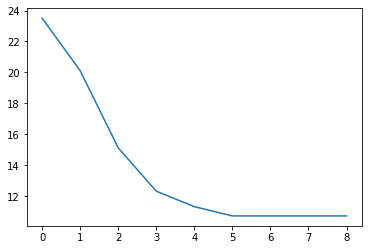

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history)
plt.show()

# Multiclass LR

In [ ]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

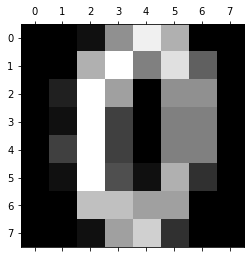

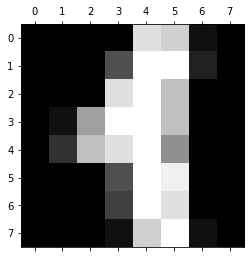

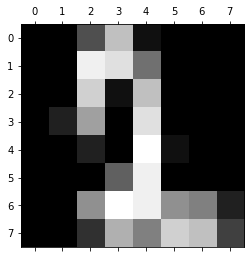

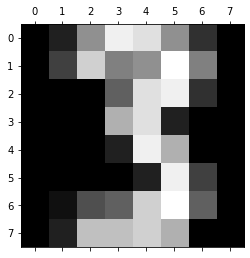

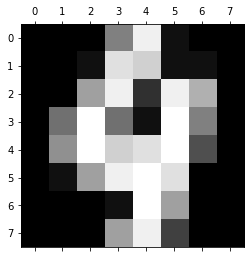

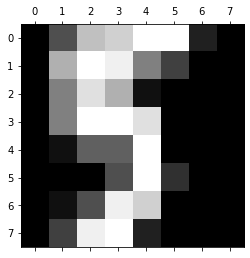

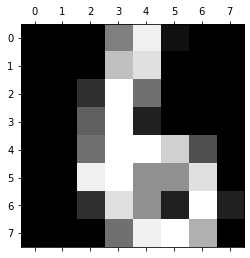

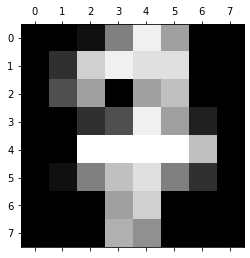

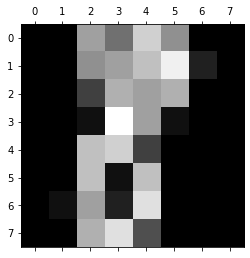

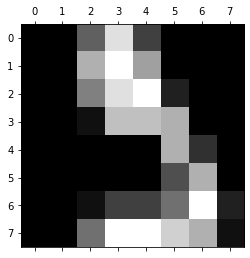

In [ ]:
plt.gray() 
for i in range(10,20):
    plt.matshow(digits.images[i])

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
print(digits.data.shape, digits.target.shape)

print(digits.feature_names)
print(digits.target_names)

(1797, 64) (1797,)
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(digits.data[1])
print(digits.target[1])

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression  # class

In [ ]:
model = LogisticRegression(max_iter= 500) 

In [ ]:
model.fit(X_train, y_train) # numpy array

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [ ]:
y_pred = model.predict(digits.data[0:5])
print(y_pred)
print(digits.target[0:5])

[0 1 2 3 4]
[0 1 2 3 4]


In [ ]:
model.score(X_test, y_test)

0.9638888888888889

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted) # y_test -> true output, y_predicted -> estimated/ predicted output by the model
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 40,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  1],
       [ 0,  2,  0,  0,  1,  1,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 36]])

Text(159.0, 0.5, 'Truth')

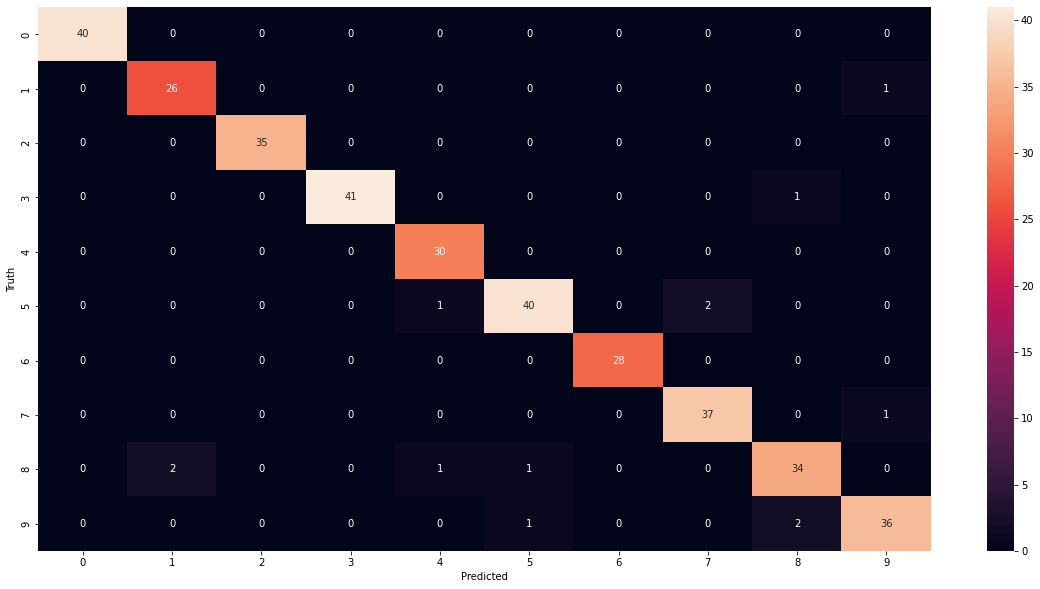

In [ ]:
import seaborn as sn # data visualization is a sub domain of data mining
plt.figure(figsize = (20,10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')